In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df['target'] = diabetes.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
# Split the data into X and Y
X = diabetes_df.drop('target', axis=1)
Y = diabetes_df['target']
X.shape, Y.shape

((442, 10), (442,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape, Y_train.shape}")
print(f"Test set shape: {X_test.shape, Y_test.shape}")

Training set shape: ((353, 10), (353,))
Test set shape: ((89, 10), (89,))


In [9]:
from sklearn.linear_model import LinearRegression

# Create the model
lr = LinearRegression()

In [10]:
# Training the model
lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Predict on the testing set
# Y_preds are the predicted values based on the data
y_pred = lr.predict(X_test)
y_pred.shape

(89,)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
intercept = lr.intercept_


print(f"R2 score: {r2}\nMean Squared error: {mse}\nMean absolute error: {mae}\nIntercept: {intercept}")

R2 score: 0.4526027629719197
Mean Squared error: 2900.19362849348
Mean absolute error: 42.79409467959994
Intercept: 151.34560453985995


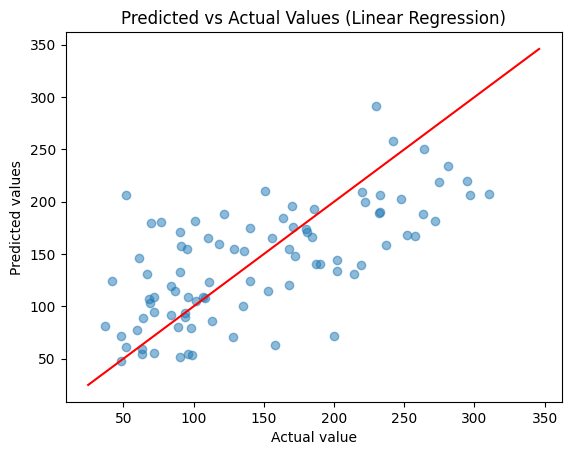

In [15]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values
# predicted values are on the x-axis, actual values on the y-axis

plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Values (Linear Regression)")
plt.show()

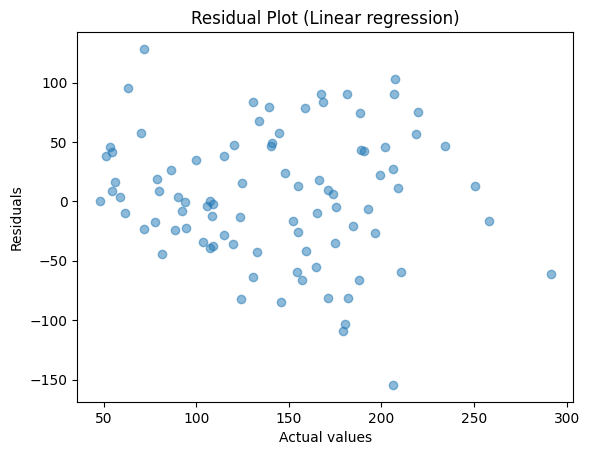

In [17]:
# plot the residuals
# The residuals are plotted against the predicted 
# We don't want them grouped around zero
plt.scatter(y_pred, Y_test - y_pred, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear regression)")
plt.show()